In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
#завантажимо набори даних
X_tr = pd.read_csv('train.csv', sep=',')
X_te = pd.read_csv('test.csv', sep=',')
print('Training set shape is {}'.format(X_tr.shape))
print('Test set shape is {}'.format(X_te.shape))

Training set shape is (891, 12)
Test set shape is (418, 11)


In [3]:
#знайдемо колонку в X_tr якої немає в X_te
X_tr.columns.difference(X_te.columns)[0]

'Survived'

In [4]:
#видалимо колонку Survived бо вона використовується для класифікації
X_tr = X_tr.drop('Survived', axis=1)
print('Now shape of training set is {}'.format(X_tr.shape))

Now shape of training set is (891, 11)


In [5]:
#об'єднаємо набори даних і перевіримо на наявність дублікати
dataX = pd.concat([X_tr, X_te], ignore_index=True, verify_integrity=True)
dataX.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
dataX.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [7]:
#дослідимо відсутні значення
missing = dataX.isnull().sum()
missing = missing[missing != 0]
n_observations = dataX.shape[0]

fractionOnMissing = missing / n_observations * 100
fractionOnMissing = fractionOnMissing.apply(np.round)

statsOnMissing = pd.concat([missing, fractionOnMissing], axis=1).rename(columns={0:'quantity', 1:'fraction'})
display(statsOnMissing)

,quantity,fraction
Age,263,20.0
Fare,1,0.0
Cabin,1014,77.0
Embarked,2,0.0


In [8]:
#видалимо колонки PassengerId i Cabin
dataX.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
print('Dataset shape is {}'.format(dataX.shape))

Dataset shape is (1309, 9)


In [9]:
#скільки категоріальних фіч
dataTypes = dataX.dtypes.value_counts()
print('There are {} categorical features'.format(dataTypes['object']))

There are 4 categorical features


In [10]:
#як багато з них має відсутні значення
print('Missing categorical values in Dataset: \n{}'.format(dataX[['Name', 'Sex', 'Ticket', 'Embarked']].isnull().sum()))

Missing categorical values in Dataset: 
Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64


In [11]:
#Заповнимо 2 відсутні значення модою, оскільки працюємо з категоріальною колонкою
modeEmbarked = dataX['Embarked'].mode()[0]
dataX['Embarked'].fillna(modeEmbarked, inplace=True)

In [12]:
#для колонки Sex застосуємо Label Encoding, а для всіх інших One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataX['Sex'])
dataX['Sex'] = le.transform(dataX['Sex'])

dataX = pd.get_dummies(dataX)

In [13]:
#тепер кількість фіч становить
print('There are {} features in dataset'.format(dataX.shape[1]))

There are 2245 features in dataset


In [14]:
#усі колонки які лишились з відсутніми значеннями заповнимо медіаною
for i in range(2):
    column = missing.index[i]
    median = dataX[column].median()
    dataX[column].fillna(median, inplace=True)

In [15]:
#стандартизуємо фічі, розмах яких >> 1
#це знадобиться як для K-Means так і для PCA
from sklearn.preprocessing import StandardScaler
featureList = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
scaler.fit(dataX[featureList])
dataX[featureList] = scaler.transform(dataX[featureList])
dataX.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.841916,1,-0.581628,0.481288,-0.445000,-0.503291,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.546098,0,0.658652,0.481288,-0.445000,0.734744,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.841916,0,-0.271558,-0.479087,-0.445000,-0.490240,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.546098,0,0.426099,0.481288,-0.445000,0.383183,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.841916,1,0.426099,-0.479087,-0.445000,-0.487824,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.841916,1,-0.116523,-0.479087,-0.445000,-0.479930,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,-1.546098,1,1.898932,-0.479087,-0.445000,0.359257,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0.841916,1,-2.131979,2.402037,0.710763,-0.235995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0.841916,0,-0.194041,-0.479087,1.866526,-0.428210,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,-0.352091,0,-1.201768,0.481288,-0.445000,-0.062068,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Elbow Method')

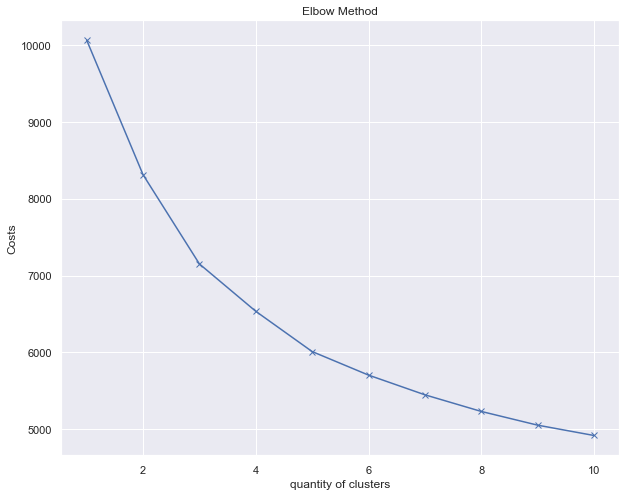

In [16]:
#скористаємось методом ліктя для визначення кількості кластерів
from sklearn.cluster import KMeans

costs = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='random', n_init=10, random_state=0)
    km.fit(dataX)
    costs.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), costs, marker='x')
plt.xlabel('quantity of clusters')
plt.ylabel('Costs')
plt.title('Elbow Method')

In [17]:
#натренуємо k-means при k=3
model_km = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)
clusterDistribution = model_km.fit_predict(dataX)

In [18]:
#застосуємо PCA для зменшення розмірності набору даних з метою візуалізації
from sklearn.decomposition import PCA
model_pca2d = PCA(n_components=2)

dataX_ld = model_pca2d.fit_transform(dataX)
clusterCenters = model_pca2d.transform(model_km.cluster_centers_)

Text(0, 0.5, 'PrincipalComponent2')

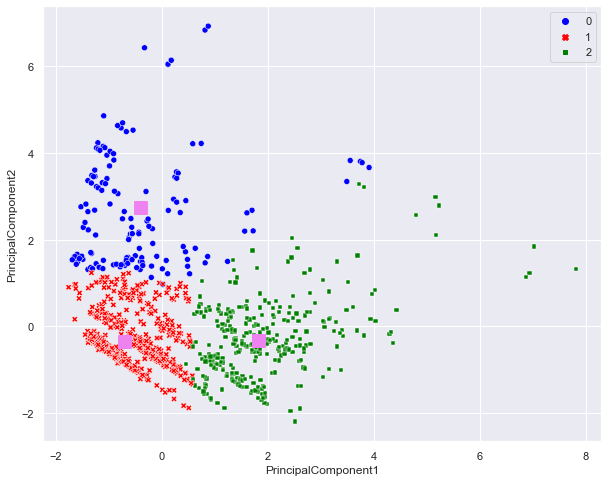

In [19]:
#нарешті побудуємо результат роботи програми
plt.figure(figsize=[10,8])
sns.scatterplot(x=dataX_ld[:,0], y=dataX_ld[:,1], hue=clusterDistribution, palette=['blue','red','green'], style=clusterDistribution)
plt.scatter(clusterCenters[:,0], clusterCenters[:,1], s=130, c='violet', marker='s', linewidths=2, edgecolors='violet')
plt.xlabel('PrincipalComponent1')
plt.ylabel('PrincipalComponent2')